In [1]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent 
from langchain_openai import ChatOpenAI

import matplotlib.pyplot as plt
import pandas as pd
import streamlit as st

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import sys
sys.path.append("D:/Study/UNIVERSITY/OTHER COURSES/random coding/Portfolio Projects/000. GITHUB/Data-Analytics-Buddy/dabuddy")
from src.models.llm import load_llm

MODEL_NAME = "gpt-3.5-turbo"
llm = load_llm(model_name = MODEL_NAME)
llm

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x000001E13466F890>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x000001E1346A49E0>, root_client=<openai.OpenAI object at 0x000001E132987380>, root_async_client=<openai.AsyncOpenAI object at 0x000001E13466E1B0>, temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), max_tokens=1000)

In [3]:
llm.invoke("Hello?")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-3dc30d3c-24b5-4b89-a5ec-decb2654ad0d-0', usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

In [4]:
df = pd.read_csv(r"D:\Study\UNIVERSITY\THIRD YEAR\Machine Learning\data files\in-book datasets\FlightDelays.csv")
da_agent = create_pandas_dataframe_agent(llm=llm, 
                                            df=df,
                                            agent_type="tool-calling",
                                            allow_dangerous_code = True,
                                            verbose = True,
                                            return_intermediate_steps = True)
da_agent

AgentExecutor(verbose=True, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[l

In [28]:
query = "Describe this dataset"
response = da_agent(query)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.describe()'}`


       CRS_DEP_TIME     DEP_TIME     DISTANCE       FL_NUM      Weather  \
count   2201.000000  2201.000000  2201.000000  2201.000000  2201.000000   
mean    1371.938664  1369.298955   211.871422  3815.086324     0.014539   
std      432.697149   442.462754    13.316815  2409.750224     0.119725   
min      600.000000    10.000000   169.000000   746.000000     0.000000   
25%     1000.000000  1004.000000   213.000000  2156.000000     0.000000   
50%     1455.000000  1450.000000   214.000000  2385.000000     0.000000   
75%     1710.000000  1709.000000   214.000000  6155.000000     0.000000   
max     2130.000000  2330.000000   229.000000  7924.000000     1.000000   

          DAY_WEEK  DAY_OF_MONTH  
count  2201.000000   2201.000000  
mean      3.905498     16.024989  
std       1.903149      8.677390  
min       1.000000      1.000000  
25%       2.000000      8.000000  
50%      

In [29]:
response["intermediate_steps"][-1][0].tool_input["query"]

'df.describe()'

In [30]:
response["output"]

'The dataset contains the following columns:\n\n- CRS_DEP_TIME: Scheduled departure time\n- DEP_TIME: Actual departure time\n- DISTANCE: Distance of the flight\n- FL_NUM: Flight number\n- Weather: Indicates if there was any weather impact (0 for no impact, 1 for impact)\n- DAY_WEEK: Day of the week (1 for Monday, 7 for Sunday)\n- DAY_OF_MONTH: Day of the month\n\nHere are some statistics for the numerical columns:\n- The mean scheduled departure time is approximately 1371.94\n- The mean actual departure time is approximately 1369.30\n- The mean distance of the flights is approximately 211.87\n- The mean flight number is approximately 3815.09\n- The mean weather impact is very low, with a mean of 0.0145\n- The mean day of the week is approximately 3.91\n- The mean day of the month is approximately 16.02\n\nThese statistics provide an overview of the central tendency and spread of the numerical data in the dataset.'



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import seaborn as sns\nimport matplotlib.pyplot as plt\n\nsns.scatterplot(x='CRS_DEP_TIME', y='DISTANCE', data=df)\nplt.title('Scatter Plot of CRS_DEP_TIME vs Distance')\nplt.xlabel('CRS_DEP_TIME')\nplt.ylabel('Distance')\nplt.show()"}`




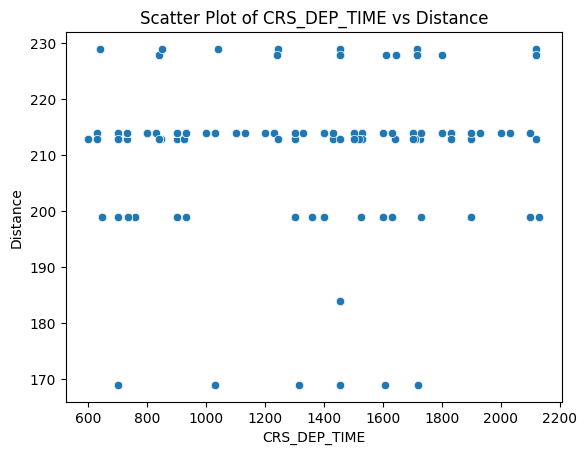

Here is the scatter plot of CRS_DEP_TIME vs Distance using Seaborn. The plot shows the relationship between the scheduled departure time and the distance of the flights.

> Finished chain.


In [22]:
query = "Scatter plot of crs_dep_time and distance using seaborn"
response = da_agent(query)

In [23]:
print(response["intermediate_steps"][-1][0].tool_input["query"])

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='CRS_DEP_TIME', y='DISTANCE', data=df)
plt.title('Scatter Plot of CRS_DEP_TIME vs Distance')
plt.xlabel('CRS_DEP_TIME')
plt.ylabel('Distance')
plt.show()


In [27]:
response

{'input': 'Scatter plot of crs_dep_time and distance using seaborn',
 'output': 'Here is the scatter plot of CRS_DEP_TIME vs Distance using Seaborn. The plot shows the relationship between the scheduled departure time and the distance of the flights.',
 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import seaborn as sns\nimport matplotlib.pyplot as plt\n\nsns.scatterplot(x='CRS_DEP_TIME', y='DISTANCE', data=df)\nplt.title('Scatter Plot of CRS_DEP_TIME vs Distance')\nplt.xlabel('CRS_DEP_TIME')\nplt.ylabel('Distance')\nplt.show()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import seaborn as sns\\nimport matplotlib.pyplot as plt\\n\\nsns.scatterplot(x=\'CRS_DEP_TIME\', y=\'DISTANCE\', data=df)\\nplt.title(\'Scatter Plot of CRS_DEP_TIME vs Distance\')\\nplt.xlabel(\'CRS_DEP_TIME\')\\nplt.ylabel(\'Distance\')\\nplt.show()"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_x5tOu4lD